# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

## Attribute Information:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

**Train a machine learning model**

When our data is ready for modelling, we should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, we should use an algorithm that easily allows us to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

**Evaluate model and present findings**

After training our model, we should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, we should create a visualisation to interpret how each variable contributed to the model.

In [55]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Read the dataset
df=pd.read_csv('customer_booking.csv',encoding="ISO-8859-1")

In [56]:
#First 5 rows of dataset
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0


In [57]:
#Last 5 rows of dataset
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [58]:
# Let's find that which columns are categorical in dataset
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [4]:
#Let's print categorical columns which maybe we don't need or it is required to encode
print(df.sales_channel.unique())
print(df.trip_type.unique())
print(df.flight_day.unique())
print(df.booking_origin.unique())
print(df.route.unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'N

In [5]:
#let's drop booking origin and route columns which we don't need
df.drop(["booking_origin","route"],axis=1,inplace = True)

## One Hot Encoding

In [6]:
#sales_channel
mapping_sales_channel = {
    "Internet": 0,
    "Mobile": 1
}

df["sales_channel"]=df["sales_channel"].map(mapping_sales_channel)

#trip_type
mapping_trip_type = {
    "RoundTrip": 0,
    "CircleTrip": 1,
    "OneWay": 2
}

df["trip_type"]=df["trip_type"].map(mapping_trip_type)

#flight day
mapping_flight_day = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping_flight_day)

In [7]:
#Let's check first 5 rows of data after dropping some columnsa and encoding
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0


In [8]:
#Shape of dataset
df.shape

(50000, 12)

In [64]:
#Some statistics values of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
sales_channel,50000.0,0.112360,0.315812,0.00,0.00,0.00,0.00,1.0
trip_type,50000.0,0.017800,0.181559,0.00,0.00,0.00,0.00,2.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0


In [9]:
#Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 4.6 MB


In [10]:
#Types of columns
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

## Correlation matrix

<AxesSubplot:>

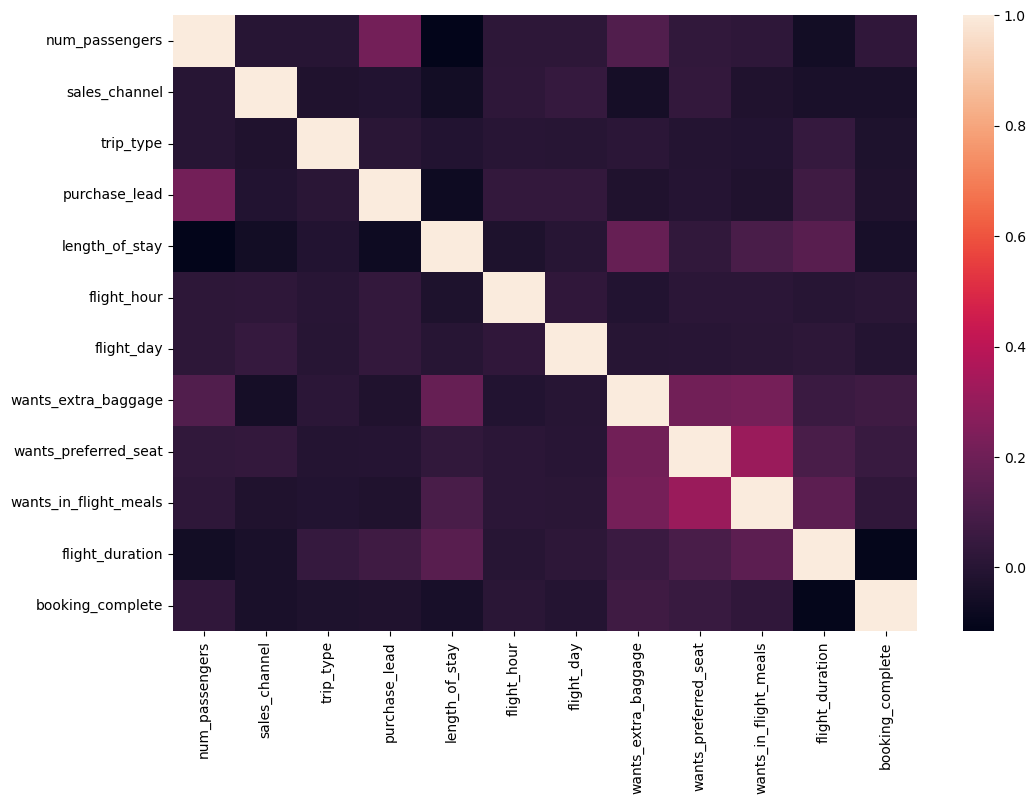

In [11]:
corr = df.corr()

plt.figure(figsize=(12,8))

#plot the heatmap
sns.heatmap(corr)

## Let's split the data into Features Variables(X) and Target Variable(y)

In [12]:
X = df.drop(['booking_complete'], axis=1)


y = df['booking_complete']

In [70]:
X.shape

(50000, 11)

In [71]:
y.shape

(50000,)

## Train-Test Split

Train size = %80

Test size = %20

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape,X_test.shape

((40000, 11), (10000, 11))

## Feature Scaling

In [15]:
#Let's create Standart Scaler
scale = StandardScaler()

In [16]:
#It is required to scale columns because there are differences the value of columns
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
20330,1,1,0,18,21,14,2,1,0,0,8.83
17532,1,0,0,23,41,5,1,1,0,1,4.75
45819,2,1,0,46,6,17,6,1,1,1,5.33
34807,1,0,0,40,4,12,5,0,1,0,4.67
31888,1,0,0,56,4,3,5,1,1,1,7.00


In [17]:
#It is required to scale columns because there are differences the value of columns
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11841,2,0,0,33,20,9,2,1,1,1,8.83
19602,1,0,0,115,137,12,5,1,0,0,8.83
45519,1,0,0,14,6,4,4,0,0,0,6.42
25747,1,0,0,1,2,15,1,1,1,0,4.75
42642,1,0,0,47,6,1,6,0,0,1,7.57


In [18]:
#Let's create an object to know x train columns
columns=X_train.columns

In [19]:
#Scale X train and X test
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [20]:
#the type of data changes after scaling
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
#Let's convert numpy array to pandas dataframe
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [22]:
#First 5 rows of X train after scaling
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,-0.579221,2.807662,-0.098803,-0.739942,-0.061043,0.907074,-0.909853,0.707810,-0.646986,-0.86506,1.035417
1,-0.579221,-0.356168,-0.098803,-0.684686,0.528727,-0.755604,-1.410922,0.707810,-0.646986,1.15599,-1.686049
2,0.403509,2.807662,-0.098803,-0.430508,-0.503370,1.461300,1.094422,0.707810,1.545629,1.15599,-1.299174
3,-0.579221,-0.356168,-0.098803,-0.496815,-0.562347,0.537590,0.593353,-1.412809,1.545629,-0.86506,-1.739411
4,-0.579221,-0.356168,-0.098803,-0.319996,-0.562347,-1.125088,0.593353,0.707810,1.545629,1.15599,-0.185241


In [23]:
#First 5 rows of X test after scaling
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.403509,-0.356168,-0.098803,-0.574174,-0.090531,-0.016636,-0.909853,0.707810,1.545629,1.15599,1.035417
1,-0.579221,-0.356168,-0.098803,0.332025,3.359619,0.537590,0.593353,0.707810,-0.646986,-0.86506,1.035417
2,-0.579221,-0.356168,-0.098803,-0.784146,-0.503370,-0.940346,0.092284,-1.412809,-0.646986,-0.86506,-0.572116
3,-0.579221,-0.356168,-0.098803,-0.927812,-0.621323,1.091816,-1.410922,0.707810,1.545629,-0.86506,-1.686049
4,-0.579221,-0.356168,-0.098803,-0.419457,-0.503370,-1.494572,1.094422,-1.412809,-0.646986,1.15599,0.194964


## Machine Learning Model 

**Random Forest Classifier**

In [24]:
# Create Random Forest Classification Object
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [25]:
# Predicting the Test set results
y_pred=rf.predict(X_test)

**Performance Reporting**

In [26]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8481
Precision: 0.45588235294117646
Recall: 0.020489094514210177
F1-score: 0.0392156862745098


**Confusion Matrix**

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8450   37]
 [1482   31]]


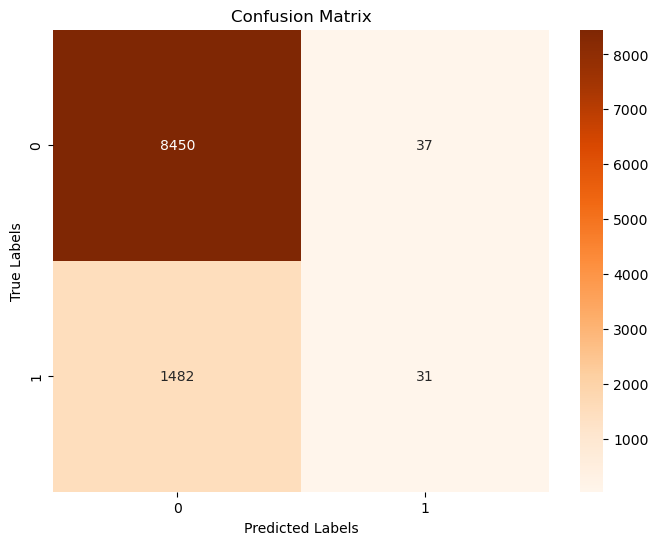

In [28]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

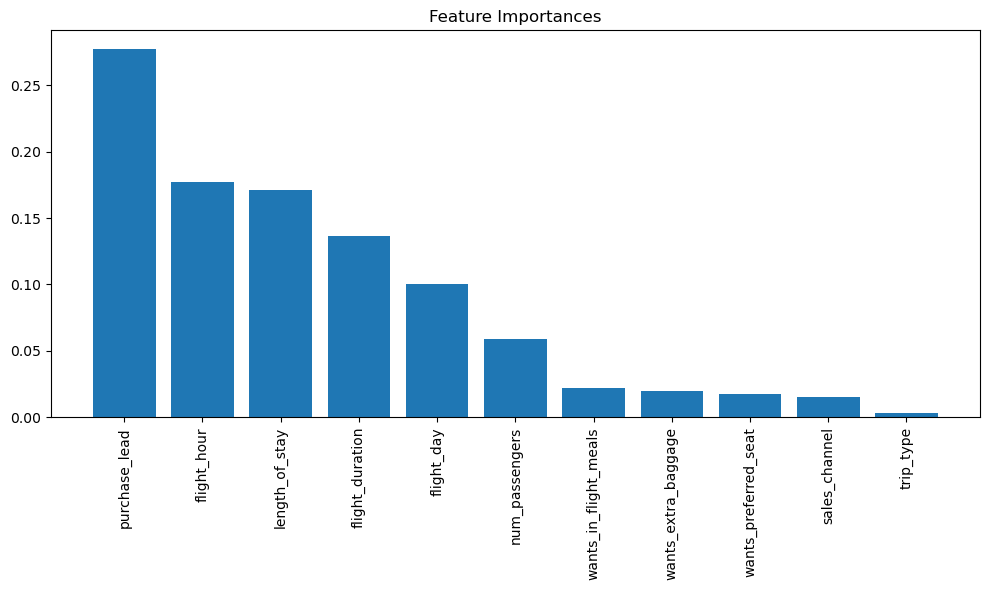

In [29]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()

Upon analyzing the performance metrics presented above, it becomes evident that the main cause of the low F1 score is an imbalanced dataset. The disparity between the number of entries classified as 0 and 1 is responsible for this issue. To rectify the situation, we can equalize the number of entries for both classes by balancing the dataset, effectively addressing the problem at hand.

## Balance The Dataset

In [30]:
#Let's check y label 
print(df.booking_complete.value_counts())

#We clearly see that the data is inbalanced in below after calculating the relative frequency (or proportion) of each unique value
print(df.booking_complete.value_counts()/np.float(len(df)))

0    42522
1     7478
Name: booking_complete, dtype: int64
0    0.85044
1    0.14956
Name: booking_complete, dtype: float64


In [31]:
# Let's create a dataframe with all labels 0 and sample 7500 rows from it
df_0 = df[df['booking_complete'] == 0].sample(n=8000, random_state=42)

# Let's create a dataframe with all 1
df_1 = df[df['booking_complete'] == 1]

# Combine df_0 and df_1
df_balanced = pd.concat([df_1, df_0], ignore_index=True)

# Split the DataFrame into features (X) and labels (y)
X = df_balanced.drop('booking_complete', axis=1)  
y = df_balanced['booking_complete']

# Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

**Random Forest Classifier for balanced dataset**

In [32]:
# Create Random Forest Classification Object
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [33]:
# Predicting the Test set results
balanced_y_pred=rf.predict(X_test)

**Performance Reporting for balanced dataset**

In [34]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, balanced_y_pred)
precision = precision_score(y_test, balanced_y_pred)
recall = recall_score(y_test, balanced_y_pred)
f1 = f1_score(y_test, balanced_y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6353359173126615
Precision: 0.6311706629055007
Recall: 0.5962691538974018
F1-score: 0.6132237067488866


**Confusion Matrix for balanced dataset**

In [35]:
conf_matrix = confusion_matrix(y_test, balanced_y_pred)
print(conf_matrix)

[[1072  523]
 [ 606  895]]


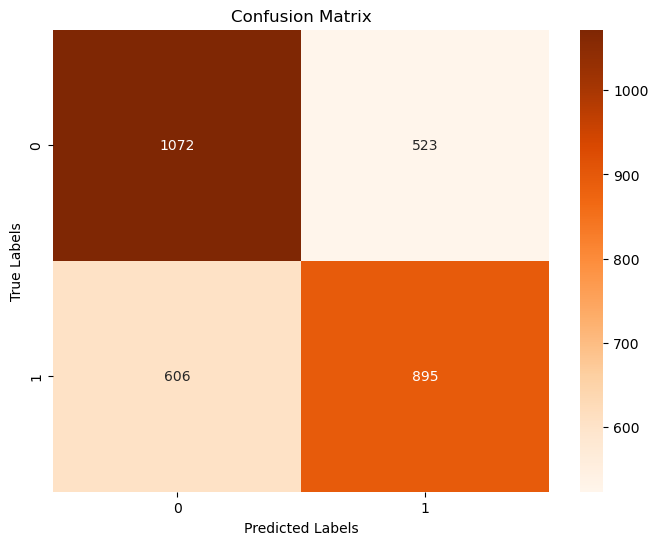

In [36]:
# Create a heatmap of the confusion matrix for balanced dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

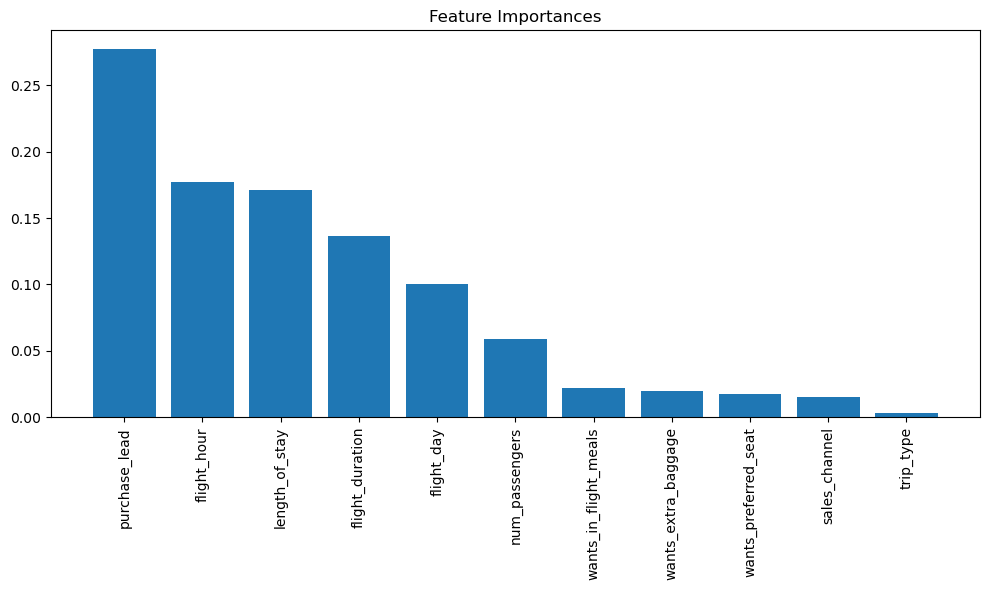

In [96]:
# Get feature names from the original DataFrame
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()

## Random Forest Classifier with Hyperparameter Tuning

In [38]:
# Let's create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [39]:
# Let's define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [40]:
# Let's create GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [41]:
# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [43]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

**Model Building**

In [45]:
# Train the model on the balanced training data
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [49]:
# Make predictions on the test dataset
best_y_pred = best_rf.predict(X_test)

**Performance Reporting for the best model**

In [50]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, best_y_pred)
precision = precision_score(y_test, best_y_pred)
recall = recall_score(y_test, best_y_pred)
f1 = f1_score(y_test, best_y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6379198966408268
Precision: 0.6376811594202898
Recall: 0.586275816122585
F1-score: 0.6108989934050677


**Confusion Matrix for the best model**

In [51]:
conf_matrix = confusion_matrix(y_test, best_y_pred)
print(conf_matrix)

[[1095  500]
 [ 621  880]]


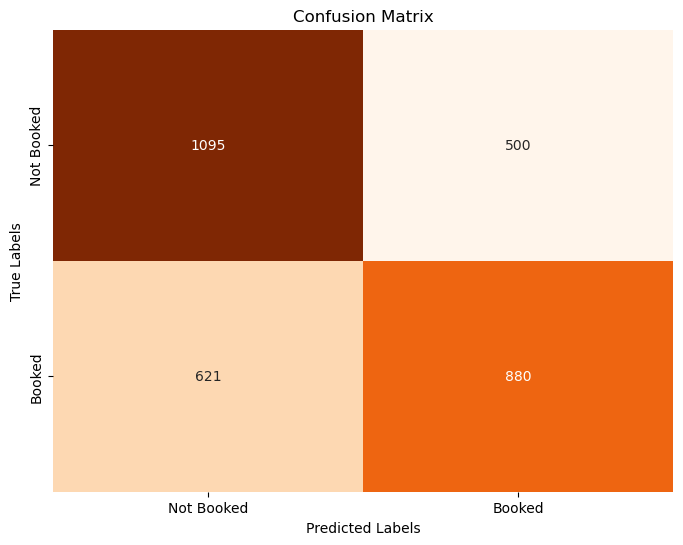

In [53]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Not Booked', 'Booked'],
            yticklabels=['Not Booked', 'Booked'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

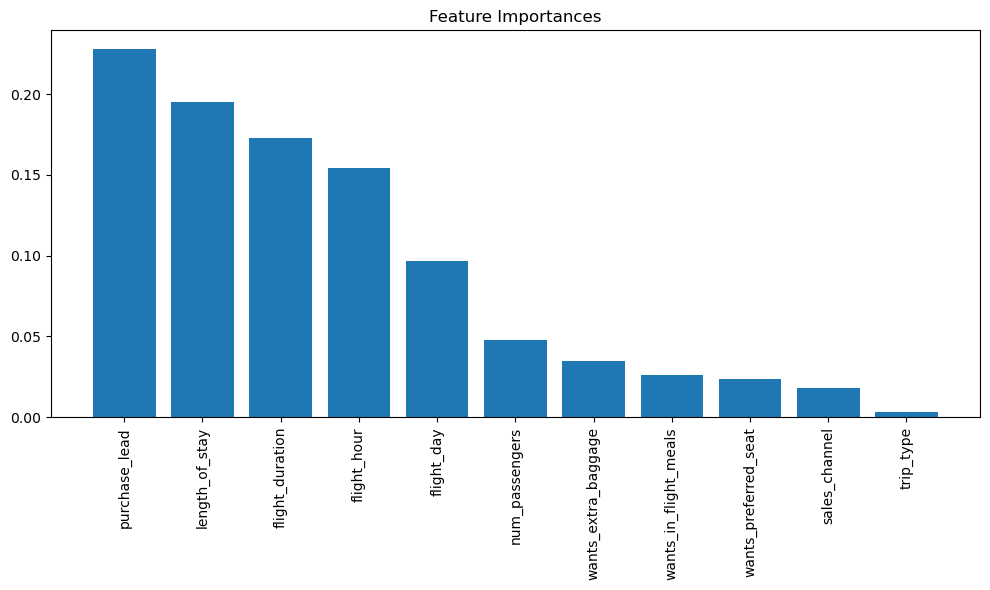

In [54]:
# Get feature importances from the best_rf model
importances = best_rf.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Get feature names from the original DataFrame
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()